# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url + "&units=" + "metric")
        city_weather = weather_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | benjamin constant
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nishihara
Processing Record 4 of Set 1 | mehamn
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ambulu
Processing Record 11 of Set 1 | guilin
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | kirensk
Processing Record 17 of Set 1 | gotsu
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | puerto escondido
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | itupiranga
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | ri

Processing Record 34 of Set 4 | fukue
Processing Record 35 of Set 4 | semme
Processing Record 36 of Set 4 | ust-ishim
Processing Record 37 of Set 4 | murgab
Processing Record 38 of Set 4 | jiwani
Processing Record 39 of Set 4 | vila
Processing Record 40 of Set 4 | khilok
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | tombouctou
Processing Record 43 of Set 4 | sobolevo
Processing Record 44 of Set 4 | gualeguay
Processing Record 45 of Set 4 | fare
Processing Record 46 of Set 4 | kedrovyy
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | port augusta
Processing Record 50 of Set 4 | rocha
Processing Record 1 of Set 5 | pahrump
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | xining
Processing Record 6 of Set 5 | sao felix do xingu
Processing Record 7 of Set 5 | novaya igirma
Processing Record 

Processing Record 30 of Set 8 | sikasso
Processing Record 31 of Set 8 | ponta do sol
Processing Record 32 of Set 8 | temaraia
City not found. Skipping...
Processing Record 33 of Set 8 | siniscola
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | hunza
City not found. Skipping...
Processing Record 36 of Set 8 | jalu
Processing Record 37 of Set 8 | jupiter
Processing Record 38 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 39 of Set 8 | tungkang
City not found. Skipping...
Processing Record 40 of Set 8 | marquette
Processing Record 41 of Set 8 | caiaponia
Processing Record 42 of Set 8 | codrington
Processing Record 43 of Set 8 | vardo
Processing Record 44 of Set 8 | tezu
Processing Record 45 of Set 8 | aalsmeer
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | batken
Processing Record 48 of Set 8 | ndele
Processing Record 49 of Set 8 | hofn
Processing Record 50 of Set 8 | port lincoln
Processing Record 1 of Set 9 | burni

Processing Record 13 of Set 12 | san antonio
Processing Record 14 of Set 12 | babu
Processing Record 15 of Set 12 | iquique
Processing Record 16 of Set 12 | wellington
Processing Record 17 of Set 12 | opuwo
Processing Record 18 of Set 12 | mount gambier
Processing Record 19 of Set 12 | kahuta
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | kalaleh
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | keelung
Processing Record 24 of Set 12 | skjervoy
Processing Record 25 of Set 12 | limon
Processing Record 26 of Set 12 | tolmachevo
Processing Record 27 of Set 12 | quelimane
Processing Record 28 of Set 12 | manaure
Processing Record 29 of Set 12 | caraquet
Processing Record 30 of Set 12 | sisimiut
Processing Record 31 of Set 12 | buala
Processing Record 32 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 12 | wufeng
Processing Record 34 of Set 12 | matara
Processing Record 35 of Set 12 | feijo
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [7]:
# Display sample data
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,benjamin constant,-4.3831,-70.0311,31.07,74,40,3.60,BR,1681327191
1,ushuaia,-54.8000,-68.3000,4.81,60,40,10.80,AR,1681327032
2,nishihara,26.1842,127.7558,22.03,88,40,5.14,JP,1681327191
3,mehamn,71.0357,27.8492,-2.05,74,0,5.66,NO,1681327192
4,bengkulu,-3.8004,102.2655,23.91,91,60,1.61,ID,1681327192
5,yar-sale,66.8333,70.8333,-26.09,97,26,4.49,RU,1681327192
6,tuatapere,-46.1333,167.6833,10.97,95,100,2.65,NZ,1681327192
7,hithadhoo,-0.6000,73.0833,28.49,70,11,1.98,MV,1681327193
8,butaritari,3.0707,172.7902,27.41,73,97,1.95,KI,1681327193
9,ambulu,-8.3450,113.6058,24.38,93,98,1.09,ID,1681327193


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benjamin constant,-4.3831,-70.0311,31.07,74,40,3.60,BR,1681327191
1,ushuaia,-54.8000,-68.3000,4.81,60,40,10.80,AR,1681327032
2,nishihara,26.1842,127.7558,22.03,88,40,5.14,JP,1681327191
3,mehamn,71.0357,27.8492,-2.05,74,0,5.66,NO,1681327192
4,bengkulu,-3.8004,102.2655,23.91,91,60,1.61,ID,1681327192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

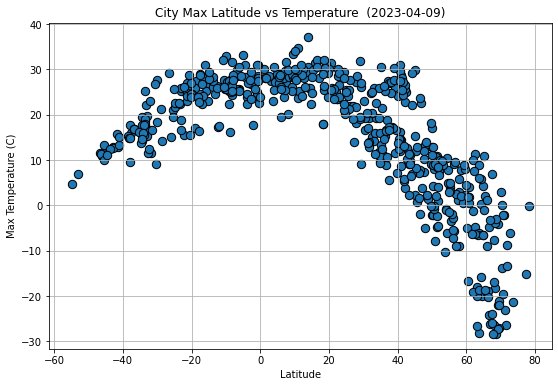

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize =(9,6))
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker="o", s=70, edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature  (2023-04-09)')
plt.rcParams['axes.labelsize'] = 14
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

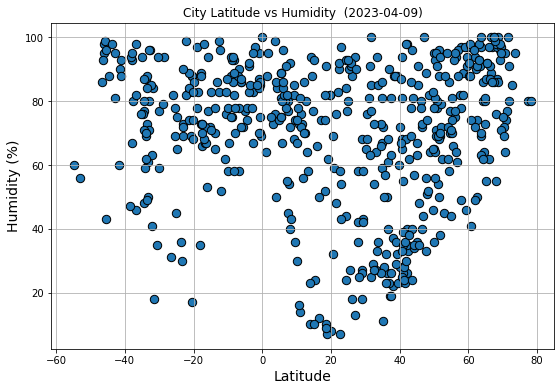

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize =(9,6))
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker="o", s=70, edgecolors="black",)

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity  (2023-04-09)')
plt.rcParams['axes.labelsize'] = 14
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

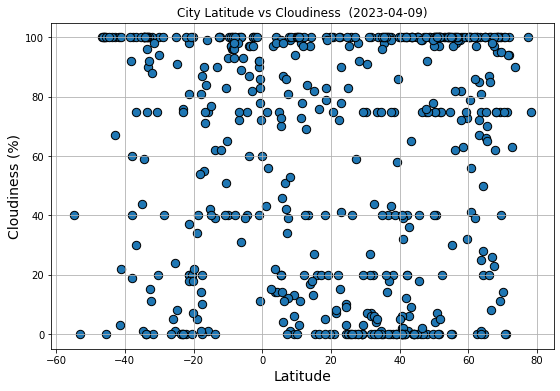

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize =(9,6))
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker="o", s=70, edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness  (2023-04-09)')
plt.rcParams['axes.labelsize'] = 14
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

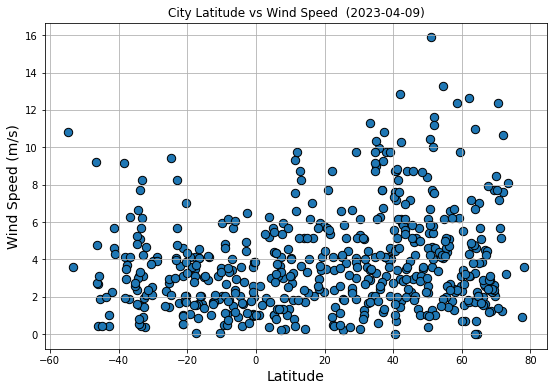

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize =(9,6))
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], marker="o", s=70, edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed  (2023-04-09)')
plt.rcParams['axes.labelsize'] = 14
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [153]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_axis, y_axis, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-value is: {rvalue}")
    reg_line = slope*x_axis + intercept
    fig = plt.figure(figsize =(9,6))
    ax = fig.add_subplot()
    plt.scatter(x_axis, y_axis, marker="o", s=70, edgecolors="black")
    plt.plot(x_axis,reg_line, color="r")
    
    #displaying regression equation on the chart
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))    
    ax.text(0.05, 0.1, line_eq, transform=ax.transAxes, fontsize=20, va='top', color='red')
    #plt.legend(loc='best', facecolor='white', edgecolor='white', title=line_eq, fontsize = 38)
    plt.rcParams['axes.labelsize'] = 14
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
   

In [147]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nishihara,26.1842,127.7558,22.03,88,40,5.14,JP,1681327191
3,mehamn,71.0357,27.8492,-2.05,74,0,5.66,NO,1681327192
5,yar-sale,66.8333,70.8333,-26.09,97,26,4.49,RU,1681327192
8,butaritari,3.0707,172.7902,27.41,73,97,1.95,KI,1681327193
10,guilin,25.2819,110.2864,21.06,90,97,0.23,CN,1681327098


In [148]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benjamin constant,-4.3831,-70.0311,31.07,74,40,3.60,BR,1681327191
1,ushuaia,-54.8000,-68.3000,4.81,60,40,10.80,AR,1681327032
4,bengkulu,-3.8004,102.2655,23.91,91,60,1.61,ID,1681327192
6,tuatapere,-46.1333,167.6833,10.97,95,100,2.65,NZ,1681327192
7,hithadhoo,-0.6000,73.0833,28.49,70,11,1.98,MV,1681327193


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8472098168816141


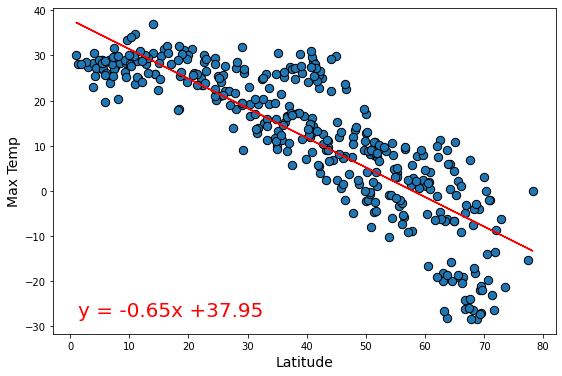

In [154]:
# Linear regression on Northern Hemisphere
label = "Max Temp"
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], label)

The r-value is: 0.797601528263708


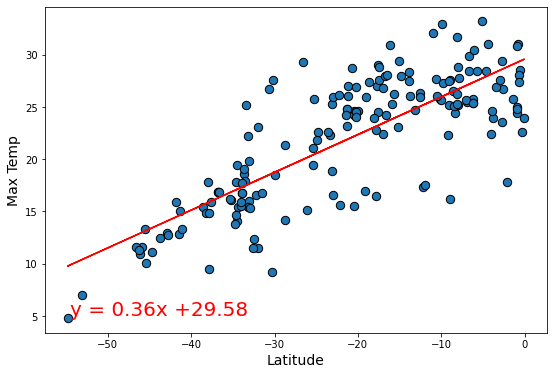

In [155]:
# Linear regression on Southern Hemisphere
label = "Max Temp"
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], label)

**Discussion about the linear relationship: We can see that the linear regression graph is decreasing for Northern Hemisphere  and it is increasing for Southern Hemisphere. That means the max temperature increases as we move from North and Souuth Poles to the Equator. The absolute values of r-values are close to 1 ("pretty well" correlation), which means our prediction of Max Temp will be rather correct. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24091807821905042


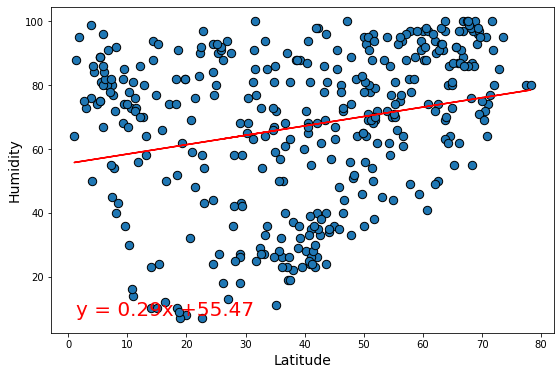

In [156]:
# Linear regression on Northern Hemisphere
label = "Humidity"
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], label)

The r-value is: 0.10191866802692062


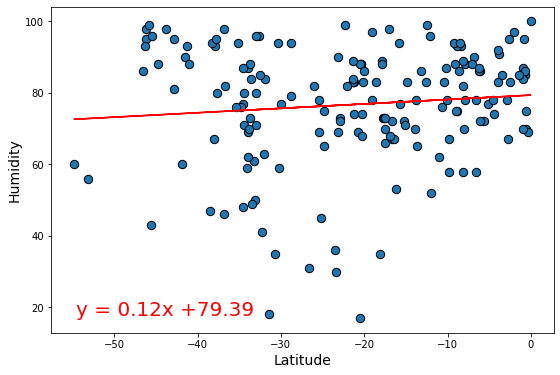

In [157]:
# Linear regression on Southern Hemisphere
label = "Humidity"
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], label)

**Discussion about the linear relationship: We can see that the linear regression graph is increasing for both Northern and Southern Hemispheres. That means the hummidity decreases as we move from North Pole to the Equator and it increases we move from South Pole to the Equator. But, in second case, the increase of the graph is small (the slope=0.12), so, the humidity is more stable. Also, the r-value = 0.10191866802692062 which means the correlation is close to 0, the data values are scattered.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22205831327182063


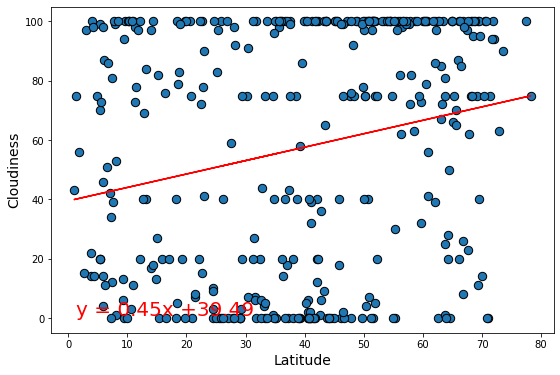

In [158]:
# Linear regression on Northern Hemisphere
label = "Cloudiness"
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], label)

The r-value is: 0.0969621886464531


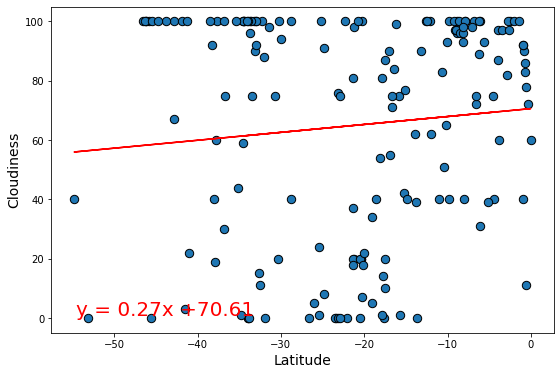

In [159]:
# Linear regression on Southern Hemisphere
label = "Cloudiness"
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], label)

**Discussion about the linear relationship: We can see that the linear regression graph is increasing for both Northern and Southern Hemispheres. That means the cloudiness decreases as we move from North Pole to the Equator and it increases we move from South Pole to the Equator. Similar to humidity case, for Southern Hemisphere the increase of the graph is smaller than that of the Northern (the slope=0.27). Similarly, r-values in these grahs are also small (0.22 and 0.1 respectively), which means the correlation is not well agreed, the data values are scattered.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10472680167756007


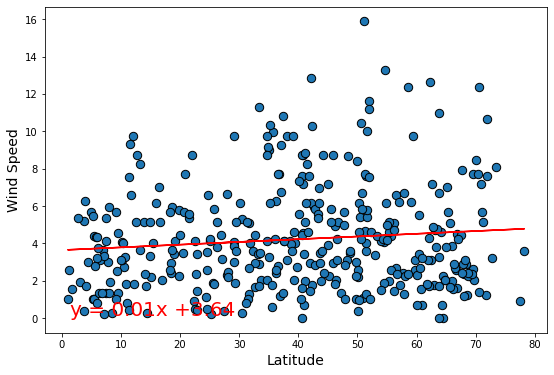

In [160]:
# Linear regression on Northern Hemisphere
label = "Wind Speed"
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], label)

The r-value is: -0.22527831802150083


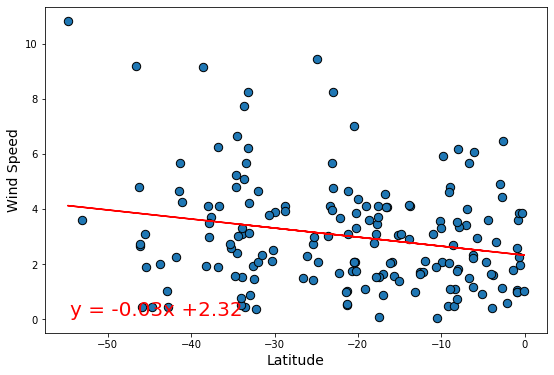

In [161]:
# Linear regression on Southern Hemisphere
label = "Wind Speed"
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], label)

**Discussion about the linear relationship: We can see that the linear regression graph is increasing for Northern Hemisphere, and decreasing for Southern Hemisphere. That means it's less windy near equator, and the wind speed increases as we move to either North of South Pole. We can predict that the speed change in general is not significant, the slopes are 0.01 and -0.03, respectively. The r-values in these grahs are also small (0.1 and -0.23 respectively), which means the correlation is not well agreed as the data values are scattered, similar to humidity and cloudiness cases.